In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import os
import zipfile
import shutil
from glob import glob


from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Project 1

- ImageDataGenrator와 TL을 이용해서 오버 피팅이 최소가 되게 정확도 90% 이상 달성.

- 만약 오버 피팅이 심하고 90% 이상의 성능이 나오지 않는다면, 문제점과 개선안을 찾아본다.

# COVID-19

- https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
- 과적합적고 정확도 90이상.

- val은 train 10% 이상되게

## 경로 설정

In [ ]:
# ROOT_DIR = 'content/COVID-19_Radiography'
# DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'COVID-19_Radiography_Dataset')
# TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, "train")
# TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, "test")


In [13]:
#### Colab
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'COVID-19_Radiography')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, "COVID-19_Radiography_Dataset/train")
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, "COVID-19_Radiography_Dataset/test")

## 데이터셋 가져오기

In [11]:
#### Colab

from google.colab import drive

drive.mount("/content/gdrive")

data_path = "/content/gdrive/MyDrive/"

shutil.copy(os.path.join(data_path, "COVID-19_Radiography.zip"), ROOT_DIR)

if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree(DATA_ROOT_DIR)

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'COVID-19_Radiography.zip'), 'r') as target_file:
    target_file.extractall(DATA_ROOT_DIR)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# #### PC
# if os.path.exists(DATA_ROOT_DIR):
#     shutil.rmtree(DATA_ROOT_DIR)

# with zipfile.ZipFile(os.path.join(ROOT_DIR, 'COVID-19_Radiography_Dataset.zip'), 'r') as target_file:
#     target_file.extractall(DATA_ROOT_DIR)

## 정답및 전체 데이터 갯수 확인

In [14]:
print(os.listdir(TRAIN_DATA_ROOT_DIR))
print(TRAIN_DATA_ROOT_DIR)

for i in range(len(os.listdir(TRAIN_DATA_ROOT_DIR))):

    path = os.path.join(TRAIN_DATA_ROOT_DIR, os.listdir(TRAIN_DATA_ROOT_DIR)[i])
    print('train ', os.listdir(TRAIN_DATA_ROOT_DIR)[i], len(os.listdir(path)))

# print('=========' * 6)

# for i in range(len(os.listdir(TEST_DATA_ROOT_DIR))):

#     path = os.path.join(TEST_DATA_ROOT_DIR, os.listdir(TEST_DATA_ROOT_DIR)[i])
#     print('Test ', os.listdir(TEST_DATA_ROOT_DIR)[i], len(os.listdir(path)))

# print('=========' * 6)

# for i in range(len(os.listdir(TEST_DATA_ROOT_DIR))):

#     path = os.path.join(VALIDATION_DATA_ROOT_DIR, os.listdir(VALIDATION_DATA_ROOT_DIR)[i])
#     print('Val ', os.listdir(VALIDATION_DATA_ROOT_DIR)[i], len(os.listdir(path)))

['Viral Pneumonia', 'Normal', 'Lung_Opacity', 'COVID']
/content/COVID-19_Radiography/COVID-19_Radiography_Dataset/train
train  Viral Pneumonia 1076
train  Normal 8154
train  Lung_Opacity 4810
train  COVID 2892


## copy

In [ ]:
# total_file_list = glob(os.path.join(DATA_ROOT_DIR, 'COVID-19_Radiography_Dataset/*'))
# print(total_file_list)

# # 정답 리스트 추출 (폴더만 추출)
# label_name_list = [filename.split('\\')[-1].strip() for filename in total_file_list if os.path.isdir(filename) == True]
# print(label_name_list)

# 각 폴더의 images 디렉토리들을 train/정답경로로 복사.
# for label_name in label_name_list:
#     src_dir_path = os.path.join(DATA_ROOT_DIR, '19_Radiography_Dataset' + '/' + label_name + '/images' )
#     # src_dir_path = os.path.join(DATA_ROOT_DIR, 'COVID-19_Radiography_Dataset')
#     print('src_dir_path', src_dir_path)

#     dst_dir_path = os.path.join(DATA_ROOT_DIR, 'train' + '/' + label_name)
#     print('dst_dir_path', dst_dir_path)

#     try:
#         shutil.copytree(src_dir_path, dst_dir_path)
#         print(label_name + ' copy tree is Done!')
#     except Exception as e:
#         print(e)


['content\\COVID-19_Radiography\\COVID-19_Radiography_Dataset\\COVID', 'content\\COVID-19_Radiography\\COVID-19_Radiography_Dataset\\Lung_Opacity', 'content\\COVID-19_Radiography\\COVID-19_Radiography_Dataset\\Normal', 'content\\COVID-19_Radiography\\COVID-19_Radiography_Dataset\\train', 'content\\COVID-19_Radiography\\COVID-19_Radiography_Dataset\\Viral Pneumonia']
['COVID', 'Lung_Opacity', 'Normal', 'train', 'Viral Pneumonia']
src_dir_path content\COVID-19_Radiography\19_Radiography_Dataset
dst_dir_path content\COVID-19_Radiography\train/COVID
[WinError 3] 지정된 경로를 찾을 수 없습니다: 'content\\COVID-19_Radiography\\19_Radiography_Dataset'
src_dir_path content\COVID-19_Radiography\19_Radiography_Dataset
dst_dir_path content\COVID-19_Radiography\train/Lung_Opacity
[WinError 3] 지정된 경로를 찾을 수 없습니다: 'content\\COVID-19_Radiography\\19_Radiography_Dataset'
src_dir_path content\COVID-19_Radiography\19_Radiography_Dataset
dst_dir_path content\COVID-19_Radiography\train/Normal
[WinError 3] 지정된 경로를 찾을 수 

# test dir 및 하위 디렉토리 생성

In [ ]:
if not os.path.exists(TEST_DATA_ROOT_DIR):
    os.mkdir(TEST_DATA_ROOT_DIR)
    print(TEST_DATA_ROOT_DIR + 'is created')
else:
    print(TEST_DATA_ROOT_DIR + 'is already extists')

for label_name in label_name_list:
    if not os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, label_name)):
        os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))
        print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + 'is created')
    else:
        print(os.path.join(TEST_DATA_ROOT_DIR, label_name) + 'is already extists')


content/COVID-19_Radiography\COVID-19_Radiography_Dataset\testis already extists
content/COVID-19_Radiography\COVID-19_Radiography_Dataset\test\COVIDis created
content/COVID-19_Radiography\COVID-19_Radiography_Dataset\test\Lung_Opacityis created
content/COVID-19_Radiography\COVID-19_Radiography_Dataset\test\Normalis created
content/COVID-19_Radiography\COVID-19_Radiography_Dataset\test\trainis created
content/COVID-19_Radiography\COVID-19_Radiography_Dataset\test\Viral Pneumoniais created


## 파일 개수 확인, 셔플 이동

In [ ]:
label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
# label_name_list

MOVE_RATIO = 0.2
move_num = 0

for label_name in label_name_list:
    src = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    dst = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    train_data_file_list = os.listdir(src)

    print("-----------------------------------------")
    print("total [%s] data file nums => [%s]"%(label_name, len(train_data_file_list)))

    np.random.shuffle(train_data_file_list)
    print("train data shuffle is done!!!")

    split_num = int(MOVE_RATIO * len(train_data_file_list))
    print("split nums =>", split_num)

    test_data_file_list = train_data_file_list[0:split_num]

    move_nums = 0
    for test_data_file in test_data_file_list:
        shutil.move(os.path.join(src, test_data_file),
                   os.path.join(dst, test_data_file))

        move_num = move_num + 1
    print("total mov num =>", move_num)
    print("-----------------------------------------")

-----------------------------------------
total [COVID] data file nums => [3615]
train data shuffle is done!!!
split nums => 723
total mov num => 723
-----------------------------------------
-----------------------------------------
total [Lung_Opacity] data file nums => [6012]
train data shuffle is done!!!
split nums => 1202
total mov num => 1925
-----------------------------------------
-----------------------------------------
total [Normal] data file nums => [10192]
train data shuffle is done!!!
split nums => 2038
total mov num => 3963
-----------------------------------------
-----------------------------------------
total [Viral Pneumonia] data file nums => [1345]
train data shuffle is done!!!
split nums => 269
total mov num => 4232
-----------------------------------------


## Image Shape 설정

In [15]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

## ImageDataGenerator를 이용하여 데이터 불러오기

In [16]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='training')

val_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                class_mode = 'sparse', shuffle = True,
                                                subset='validation')

test_generator = test_data_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                class_mode = 'sparse', shuffle = True)

Found 13547 images belonging to 4 classes.
Found 3385 images belonging to 4 classes.
Found 4233 images belonging to 4 classes.


In [18]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}
4


### 16 장의 이미지 확인

- ImageDataGenerator를 통해 전달된 이미지 출력

In [19]:
img, label = train_generator.next()
img = img[:16]
label = label[:16]

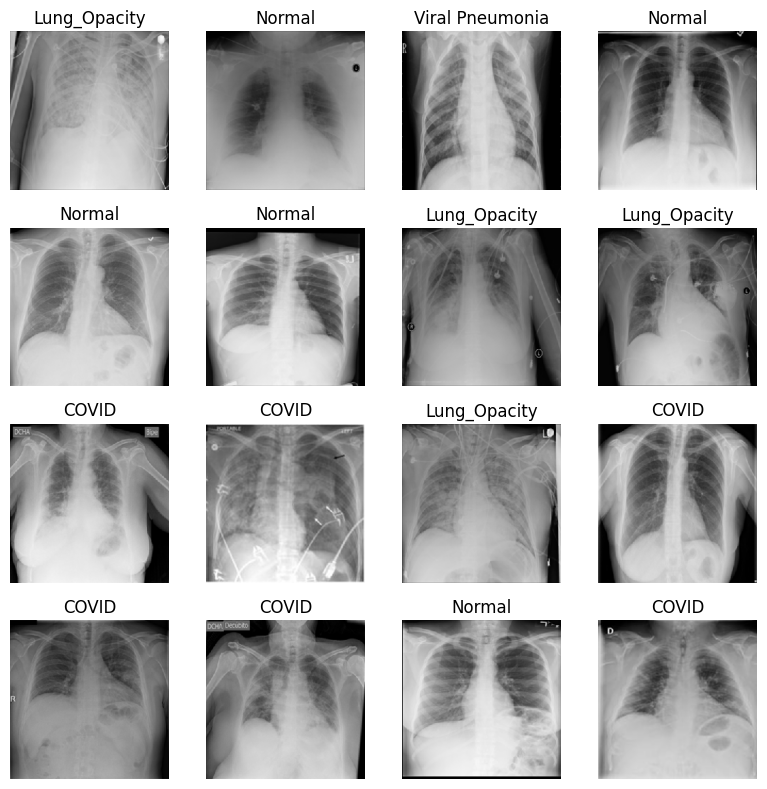

In [20]:
class_name = {0: 'COVID', 1: 'Lung_Opacity', 2: 'Normal', 3: 'Viral Pneumonia'}

plt.figure(figsize=(8, 8))
for i in range(len(img)):
    plt.subplot(4, 4, i+1)
    plt.title(class_name[int(label[i])])
    plt.imshow(img[i])
    plt.axis('off')
plt.tight_layout()


## Fine Tuining을 위한 pre-trained 정의 및 모델 구축

In [21]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False,
                             input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

pre_trained_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [32]:
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 64)                65600     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 4)                 260       
                                                                 
Total params: 3,294,724
Trainable params: 3,272,836
No

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(2e-5), metrics=['acc'])

In [34]:
start_time = datetime.now()

result = model.fit(train_generator, epochs=30, validation_data=val_generator) # epochs = 10? 30?

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/30
424/424 [==============================] - 81s 154ms/step - loss: 0.2982 - acc: 0.9009 - val_loss: 0.1725 - val_acc: 0.9439
Epoch 2/30
424/424 [==============================] - 62s 145ms/step - loss: 0.0496 - acc: 0.9881 - val_loss: 0.1932 - val_acc: 0.9474
Epoch 3/30
424/424 [==============================] - 63s 148ms/step - loss: 0.0285 - acc: 0.9938 - val_loss: 0.2039 - val_acc: 0.9498
Epoch 4/30
424/424 [==============================] - 63s 148ms/step - loss: 0.0211 - acc: 0.9955 - val_loss: 0.2341 - val_acc: 0.9495
Epoch 5/30
424/424 [==============================] - 64s 150ms/step - loss: 0.0152 - acc: 0.9962 - val_loss: 0.2326 - val_acc: 0.9486
Epoch 6/30
424/424 [==============================] - 63s 149ms/step - loss: 0.0166 - acc: 0.9963 - val_loss: 0.2671 - val_acc: 0.9518
Epoch 7/30
424/424 [==============================] - 64s 150ms/step - loss: 0.0106 - acc: 0.9975 - val_loss: 0.2695 - val_acc: 0.9424
Epoch 8/30
424/424 [==============================] - 6

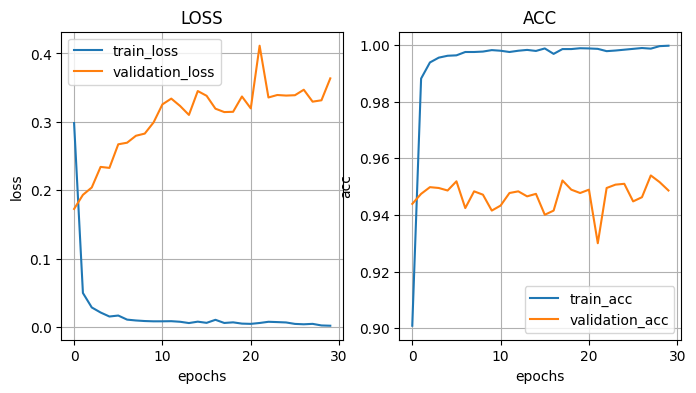

In [35]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")


plt.subplot(1, 2, 2)

plt.title("ACC")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["acc"], label="train_acc")
plt.plot(result.history["val_acc"], label="validation_acc")
plt.legend(loc="best")
plt.show()


In [31]:
model.evaluate(test_generator)

133/133 [==============================] - 13s 101ms/step - loss: 0.4806 - acc: 0.9357


[0.4806061089038849, 0.935742974281311]

In [ ]:
'''
1차 Adam(1e-5), lr=1e-5, epochs=20
히든레이어 64, 드롭 0.5
[0.23329557478427887, 0.9350342750549316]
epochs 8에서 역전 발생 모델 복잡하게 해서 정확도 높이기 과소적합 해소하기

2차 Adam(2e-5), lr=2e-5, epochs=20
히든레이어 64, 드롭 0.5, 히든레이어 64, 드롭 0.5
[0.4806061089038849, 0.935742974281311]
epochs 5에서 과적합. 모델 단순화로 해소하기
'''